# **Valhalla-23**

It has happened. Aliens have arrived. They hail from a planet called Valhalla-23, where the temperature is measured in Valks. These visitors tell you that they havecome to solve Earth’s global warming crisis*. They offer you a machine that will solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching the Earth.
3. No one knows how to transform between Celsius and Valks.
† You are tasked with finding a model for solving this problem, so you ask Humans and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.
*Valkians are not to be held responsible from any annihilation that derive from poor usage of their devices.


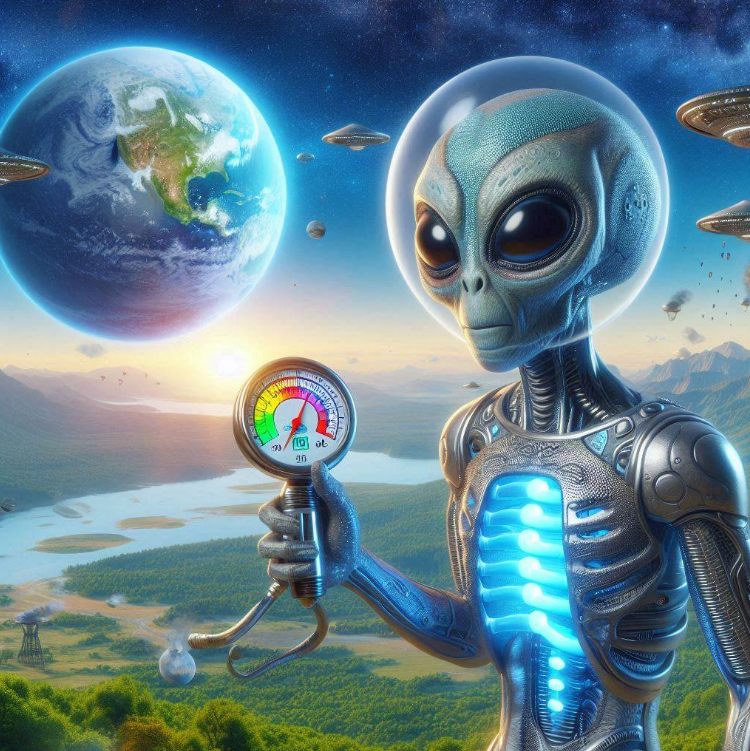

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Lectura de Datos

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
data = pd.read_csv("Valhalla23.csv")

# Exploración de Datos

Se comienza con una exploración ya que nos permite tener una mejor comprensión  sobre los datos con los que se está trabajando



"Cuanto mejor conozca un analista los datos con los que trabaja, mejor será el análisis que haga." Exploración de Datos (2024) Alteryx. Available at: https://www.alteryx.com/es/glossary/data-exploration.



In [4]:
data.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Celsius  100 non-null    float64
 1   Valks    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
data.isnull().sum()

Celsius    0
Valks      0
dtype: int64

# Selección de variables y Normalización

Buscamos poder predecir los Valks a través de los Celsius

In [7]:
X = data['Celsius'].values
y = data['Valks'].values

Los datos se normalizan para mejorar la estabilidad numérica.

In [8]:
# Normalizar los datos
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# División del conjunto de Datos

El conjunto de datos se divide en entrnamiento y prueba en una proporción 70-30. Esto debido a que el conjunto de datos es relativamente pequeño y es la proporción recomendada en estos casos.

Así mismo se establece una semilla (random_state) para que los resultados puedan ser replicables.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preparación de los Datos para el Modelo

Se agrega la columna de bias (intercepto) a X_train y X_test

y = $\theta_0 + \theta_1x$

$\theta_0$ es el término de intercepto (o bias), y $\theta_1$ es el coeficiente de la variable X. El término de intercepto $\theta_0$ permite que la línea de regresión se desplace hacia arriba o hacia abajo para ajustarse mejor a los datos.

In [10]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Modelo

 Se implementa manualmente el algoritmo de gradiente descendente para ajustar los parámetros del modelo.

 Se ejecutará hasta alcanzar el número máximo de iteracciones, el cual se ha establecido como 30,000, o hasta que las $\theta$ convergan, esto significa que los parámetros han alcanzado un punto en el que no cambian significativamente de una iteración a la siguiente durante el proceso

* Los $\theta$ se inicializan con cero debido a la facilidad, ya que esto le permitirá al modelo ajustar los valores de manera gradual y uniforme.
* Una tasa de aprendizaje de 0.01 nos permite tener un equilibrio en la velocidad de convergencia y estabilidad. Este valor nos asegura que los pasos serán suficientemente pequeños para encontrar el mínimo pero no tan pequeños como para que tarde mucho tiempo en encontrar la convergencia.
* El máximo de iteraciones se eligió un valor alto para asegurar que el modelos tenga el tiempo suficiente para converger
* Un umbral de tolerancia de 1e-6 nos asegura que el modelo sigue iterando hasta que los cambios en $\theta$ sean extremadamente pequeños, lo que indica que se ha alcanzado una solución óptima o cercana a óptima.

In [11]:
# Inicializar parámetros
theta = np.zeros(X_train.shape[1])  # Inicia con valores de 0
learning_rate = 0.01
max_iterations = 300000
tolerance = 1e-6  # Tolerancia para la convergencia

In [12]:
# Gradiente descendente con criterio de convergencia
def gradient_descent(X, y, theta, learning_rate, max_iterations, tolerance):
    m = len(y)
    cost_history = []
    prev_theta = theta.copy()
    iteration_count = 0

    for i in range(max_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

        iteration_count = i + 1  # Actualizar número de iteración

        # Criterio de convergencia
        if np.all(np.abs(theta - prev_theta) < tolerance):
            print(f'Convergencia alcanzada en la iteración {iteration_count}')
            break
        prev_theta = theta.copy()

    return theta, cost_history, iteration_count

# Función de Costo y Métricas de Evaluación

Se implementan diferentes metricas de evaluación



*  La función de costo se utiliza principalmente durante el proceso de entrenamiento para medir la calidad del modelo en cada iteración.
*  MSE es una métrica de evaluación que se usa comúnmente para medir el rendimiento de un modelo de regresión después del entrenamiento. Es una medida de la calidad del modelo en términos de la diferencia promedio cuadrática entre los valores predichos y los valores reales.
*  RMSE es la desviación estándar de los valores residuales (errores de predicción).
*  MAE (Mean Absolute Error, Error Absoluto Medio) es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de regresión. Se calcula como el promedio de la diferencia absoluta entre los valores observados y los valores predichos.
*  RMSE mide la raíz cuadrada del promedio de las diferencias al cuadrado entre las predicciones del modelo y los valores reales.




Oracle® Fusion Cloud EPM Trabajo Con Planning (2024) Moved. Available at: https://docs.oracle.com/cloud/help/es/pbcs_common/PFUSU/insights_metrics_RMSE.htm#PFUSU-GUID-FD9381A1-81E1-4F6D-8EC4-82A6CE2A6E74

Jeiinns@gmail.com (2023) Métricas de Evaluación en machine learning, Inteligencia Artificial. Available at: https://databitai.com/machine-learning/metricas-de-evaluacion-en-machine-learning/




In [13]:
# Función de costo (Error cuadrático medio)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [14]:
# Métricas de evaluación
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_pred - y_true))
    r2 = 1 - (np.sum((y_pred - y_true) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return mse, rmse, mae, r2

# Entrenamiento

In [15]:
theta, cost_history_train, iteration_count = gradient_descent(X_train, y_train, theta, learning_rate, max_iterations, tolerance)

Convergencia alcanzada en la iteración 973


# Resultados

In [16]:
# Predecir los valores para el conjunto de prueba
y_pred_train = X_train.dot(theta)
y_pred_test = X_test.dot(theta)

# Calcular métricas para el conjunto de entrenamiento
mse_train, rmse_train, mae_train, r2_train = calculate_metrics(y_train, y_pred_train)

# Calcular métricas para el conjunto de prueba
mse_test, rmse_test, mae_test, r2_test = calculate_metrics(y_test, y_pred_test)

In [17]:
print(f'Theta encontrado: {theta}')
print(f'Número de iteraciones realizadas: {iteration_count}')
print(f'Costo en el conjunto de entrenamiento: {cost_history_train[-1]}')
print(f'Costo en el conjunto de prueba: {compute_cost(X_test, y_test, theta)}')

print("\nMétricas en el conjunto de entrenamiento:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")
print(f"R²: {r2_train}")

print("\nMétricas en el conjunto de prueba:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R²: {r2_test}")

Theta encontrado: [ 0.00142724 -0.99644222]
Número de iteraciones realizadas: 973
Costo en el conjunto de entrenamiento: 0.0034098399062851385
Costo en el conjunto de prueba: 0.001550066630772575

Métricas en el conjunto de entrenamiento:
MSE: 0.006819679812570278
RMSE: 0.08258135269278578
MAE: 0.05951166245955845
R²: 0.9928852303421432

Métricas en el conjunto de prueba:
MSE: 0.00310013326154515
RMSE: 0.05567884033944268
MAE: 0.03739228422038967
R²: 0.9970017785732109


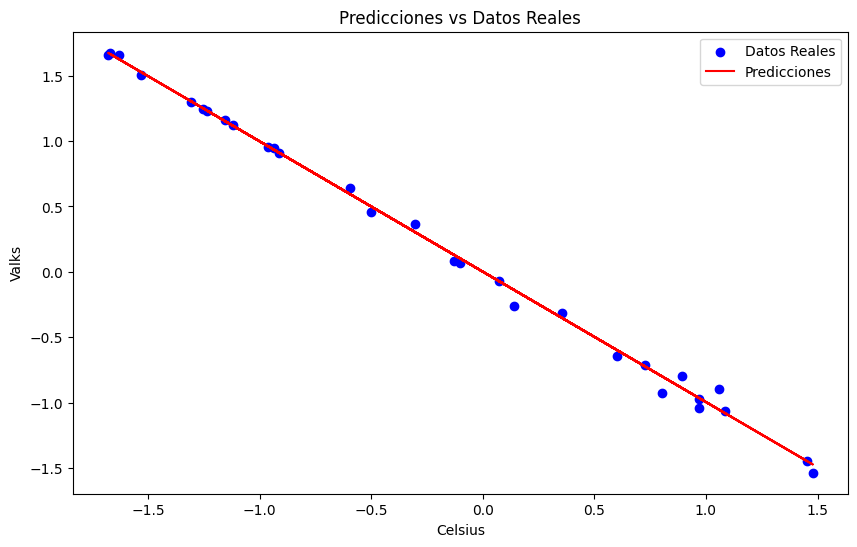

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Datos Reales')
plt.plot(X_test[:, 1], y_pred_test, color='red', label='Predicciones')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Predicciones vs Datos Reales')
plt.legend()
plt.show()

El modelo alcanza la convergencia de los valores en $\theta = [ 0.00142724 -0.99644222]$ despues de 973 iteraciones.

**Conjunto de entrenamiento**

*   El costo en el conjunto de entrenamiento es bajo (0.003409), lo que indica que el modelo ajusta bien los datos de entrenamiento.
*   MSE nos indica un error promedio bajo entre las predicciones y los valores reales.
*   MAE es relativamente pequeño
*   $R^2$ es muy cercano a 1, lo que sugiere que el modelo explica el 99.288% de la variabilidad en los datos de entrenamiento.

**Conjunto de Prueba**

*   El costo en el conjunto de prueba es todavía más bajo, lo que nos indica que el modelo generaliza bien nuevos datos.
*   MSE más bajo que en el conjunto de entrenamiento nos sugiere un excelente ajuste.
*   RMSE muestra un error menor en el conjunto de prueba
*   MAE también más bajo que en el conjunto de entrenamiento nos confirma la capacidad del modelo para predecir con precisión.
* $R^2$ nos indica que el modelo explica el 99.70% de la variabilidad en los datos de prueba. Un resultado muy bueno que suguiere una muy buena capacidad predictiva


En general el modelo es confiable para predecir la relación entre las temperaturas en Celsius y Valks
